In [57]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

from matplotlib.dates import DateFormatter
from datetime import datetime, timedelta

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month

bike_file = "trips_raw_2017.csv"
weather_file = "toronto_weather_2017.csv"
distance_file = "distance_between_stations.csv"
stations_file = "station_coordinates.csv"
stations_heat_file = "locations_summary_for_heatmap.csv"

bike_df = pd.read_csv(bike_file)
weather_df = pd.read_csv(weather_file)
distance_df = pd.read_csv(distance_file)
stations_df = pd.read_csv(stations_file)
stations_heat_df = pd.read_csv(stations_heat_file)



In [58]:
bike_df["week"] = [d.isocalendar()[1] for d in bike_df["trip_date"].astype('datetime64[ns]')]

In [59]:
weather_df["avg_temp"] = weather_df["avg_temp"]-273.15

In [60]:
combined_df = pd.merge(bike_df, weather_df, how="left", left_on="trip_date", right_on="Date")

In [61]:
combined_df = pd.merge(combined_df, distance_df, how="left", on=["from_station_name", "to_station_name"])

In [62]:
combined_df[10000:10050]

,Unnamed: 0_x,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_id,from_station_name,to_station_id,to_station_name,user_type,...,avg_temp,avg_rain,weather_main,Unnamed: 0,index,from_lat,from_lng,to_lat,to_lng,distance
10000,10000,724516,11/1/2017 21:09,11/1/2017 21:27,1108,7009.0,King St E / Jarvis St,7072.0,Queen St W / Shaw St,Member,...,4.11625,0.15,Clear,31773,3925864,43.650455,-79.371895,43.644702,-79.416279,3.629140
10001,10001,724517,11/1/2017 21:09,11/1/2017 21:15,330,7066.0,Willcocks St / St. George St,7030.0,Bay St / Wellesley St W,Member,...,4.11625,0.15,Clear,19119,2747012,43.662080,-79.397606,43.664355,-79.387143,0.879133
10002,10002,724520,11/1/2017 21:10,11/1/2017 21:16,341,7029.0,Bay St / Bloor St W,7003.0,Madison Ave / Bloor St W,Member,...,4.11625,0.15,Clear,18079,2503240,43.669716,-79.389477,43.666903,-79.402688,1.108018
10003,10003,724521,11/1/2017 21:10,11/1/2017 21:23,791,7014.0,Sherbourne St / Carlton St (Allan Gardens),7032.0,Augusta Ave / Dundas St W,Member,...,4.11625,0.15,Clear,12824,1821208,43.661743,-79.374738,43.652268,-79.401104,2.369113
10004,10004,724522,11/1/2017 21:10,11/1/2017 21:29,1120,7020.0,Phoebe St / Spadina Ave,7205.0,Rusholme Park Cres / College St W,Casual,...,4.11625,0.15,Clear,28052,3680152,43.650076,-79.396782,43.652920,-79.429633,2.662772
10005,10005,724524,11/1/2017 21:10,11/1/2017 21:17,421,7062.0,University Ave / College St,7038.0,Dundas St / Yonge St,Member,...,4.11625,0.15,Clear,4780,604592,43.659884,-79.390349,43.656325,-79.380903,0.857039
10006,10006,724526,11/1/2017 21:11,11/1/2017 21:18,452,7025.0,Ted Rogers Way / Bloor St E,7055.0,Jarvis St / Carlton St,Member,...,4.11625,0.15,Clear,2761,343444,43.671603,-79.380540,43.662420,-79.376708,1.066973
10007,10007,724528,11/1/2017 21:11,11/1/2017 21:17,395,7060.0,Princess St / Adelaide St,7033.0,Union Station,Member,...,4.11625,0.15,Clear,18287,2571984,43.652398,-79.367384,43.645220,-79.380598,1.329846
10008,10008,724529,11/1/2017 21:11,11/1/2017 21:21,611,7002.0,St George St / Bloor St W,7020.0,Phoebe St / Spadina Ave,Member,...,4.11625,0.15,Clear,13504,1913912,43.667518,-79.399819,43.650076,-79.396782,1.955399
10009,10009,724530,11/1/2017 21:13,11/1/2017 21:22,530,7160.0,King St W / Tecumseth St,7057.0,Simcoe St / Wellington St W,Member,...,4.11625,0.15,Clear,34882,4174124,43.643394,-79.405258,43.646070,-79.385523,1.616131


In [63]:
bike_data_gr = combined_df.groupby(["week", "user_type"])
bike_data_gr["trip_id"].count()

bike_data_summary = pd.DataFrame({"total_trips": bike_data_gr["trip_id"].count(),
                    "total_trip_duration_hours":bike_data_gr["trip_duration_seconds"].sum()/60/60,
                    "average_trip_duration_minutes": bike_data_gr["trip_duration_seconds"].mean()/60,
                    "total_distance": bike_data_gr["distance"].sum(),
                    "average_distance": bike_data_gr["distance"].mean(),
                    "average_temperature": bike_data_gr["avg_temp"].mean(),
                    "average_rain": bike_data_gr["avg_rain"].mean(),
                    "weather_type": bike_data_gr["weather_main"].max()
                                 })

bike_data_summary.reset_index(drop=False, inplace=True)
bike_data_summary.head()

,week,user_type,total_trips,total_trip_duration_hours,average_trip_duration_minutes,total_distance,average_distance,average_temperature,average_rain,weather_type
0,1,Casual,226,102.580556,27.233776,409.760273,1.813099,-2.441487,0.074066,Snow
1,1,Member,6326,1072.316389,10.170563,9997.100104,1.580319,-4.196826,0.098970,Snow
2,2,Casual,238,78.762778,19.856162,414.342079,1.740933,-2.434932,0.140310,Snow
3,2,Member,8442,1440.802500,10.240245,13639.525801,1.615675,-0.856764,0.210463,Snow
4,3,Casual,493,204.970556,24.945707,871.201398,1.767143,2.720760,0.047378,Mist


In [64]:
member_data = bike_data_summary[bike_data_summary["user_type"]=="Member"]
casual_data = bike_data_summary[bike_data_summary["user_type"]=="Casual"]

In [65]:
x = np.arange(0,52,1)

# generate list of dates from 01.01.2017 to 01.01.2018 through 1 day
dates = list()
dates.append(datetime.strptime('2017-01-01', '%Y-%m-%d'))
for d in x[1:]:
    dates.append(dates[d-1] + timedelta(days = 7))

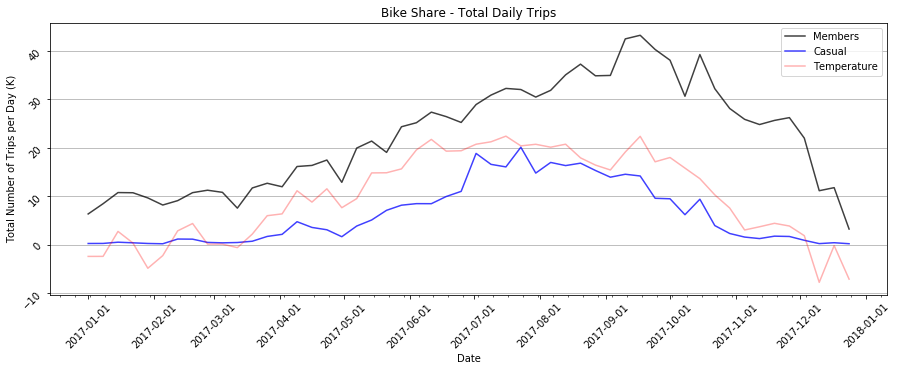

In [66]:
fig, ax1 = plt.subplots(figsize=(15,5))

ax1.plot(dates, member_data["total_trips"].values/1000, color='black', alpha=0.75, label="Members")
ax1.plot(dates, casual_data["total_trips"].values/1000, color='blue', alpha=0.75, label="Casual")
ax1.plot(dates, casual_data["average_temperature"].values, color='red', alpha=0.3, label="Temperature")

ax1.tick_params(labelrotation=45)
ax1.yaxis.grid()
ax1.xaxis.set_minor_locator(mdates.DayLocator(interval=7))
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d"))

ax1.set(xlabel="Date", ylabel="Total Number of Trips per Day (K)", title="Bike Share - Total Daily Trips")

plt.legend()

# Save the Figure
plt.savefig("total_weekly_trips_by_user_type.jpg")

#Show the Figure
plt.show()

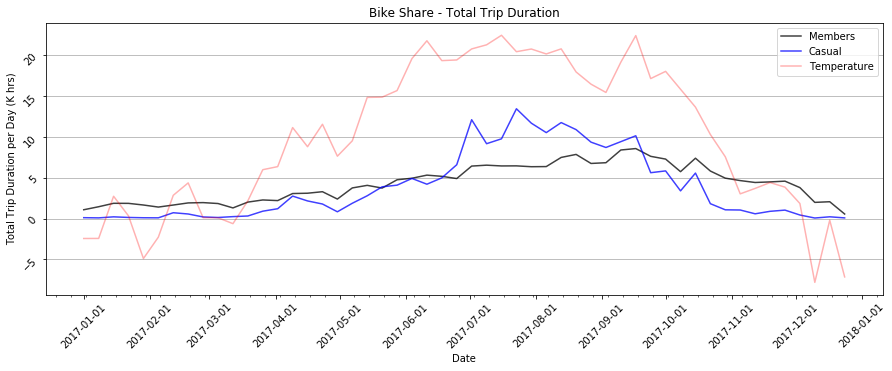

In [67]:
fig, ax1 = plt.subplots(figsize=(15,5))

ax1.plot(dates, member_data["total_trip_duration_hours"].values/1000, color='black', alpha=0.75, label="Members")
ax1.plot(dates, casual_data["total_trip_duration_hours"].values/1000, color='blue', alpha=0.75, label="Casual")
ax1.plot(dates, casual_data["average_temperature"].values, color='red', alpha=0.3, label="Temperature")

ax1.tick_params(labelrotation=45)
ax1.yaxis.grid()
ax1.xaxis.set_minor_locator(mdates.DayLocator(interval=7))
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d"))

ax1.set(xlabel="Date", ylabel="Total Trip Duration per Day (K hrs)", title="Bike Share - Total Trip Duration")

plt.legend()

# Save the Figure
plt.savefig("total_trip_duration_by_user_type.jpg")

#Show the Figure
plt.show()

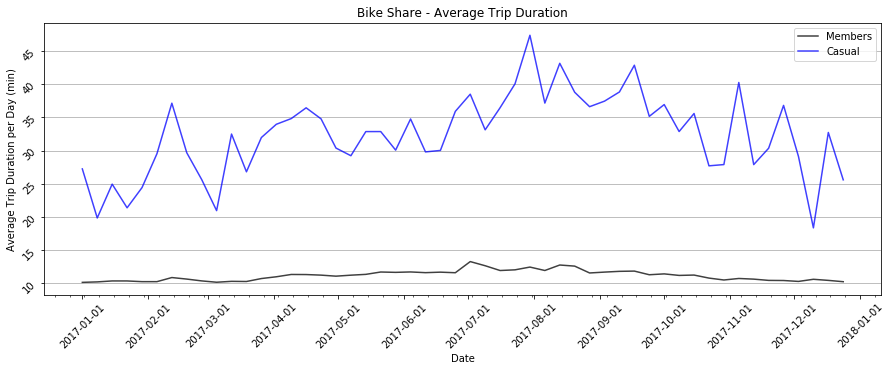

In [68]:
fig, ax1 = plt.subplots(figsize=(15,5))

ax1.plot(dates, member_data["average_trip_duration_minutes"].values, color='black', alpha=0.75, label="Members")
ax1.plot(dates, casual_data["average_trip_duration_minutes"].values, color='blue', alpha=0.75, label="Casual")
#ax1.plot(dates, casual_data["average_temperature"].values, color='red', alpha=0.3, label="Temperature")


ax1.tick_params(labelrotation=45)
ax1.yaxis.grid()
ax1.xaxis.set_minor_locator(mdates.DayLocator(interval=7))
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d"))

ax1.set(xlabel="Date", ylabel="Average Trip Duration per Day (min)", title="Bike Share - Average Trip Duration")

plt.legend()

# Save the Figure
plt.savefig("average_trip_duration_by_user_type.jpg")

#Show the Figure
plt.show()


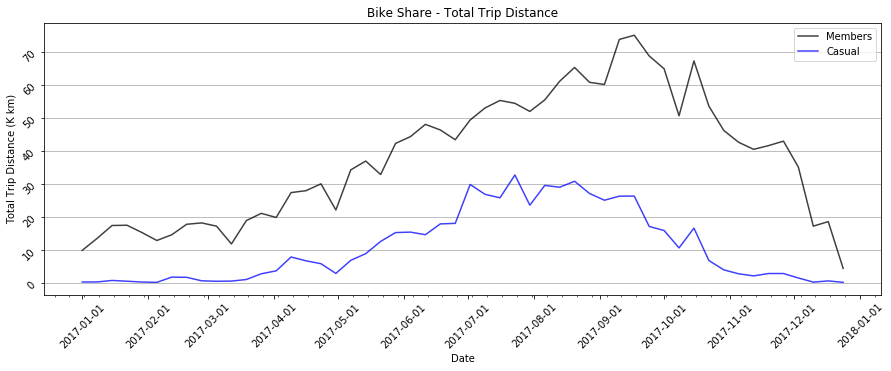

In [69]:
fig, ax1 = plt.subplots(figsize=(15,5))

ax1.plot(dates, member_data["total_distance"].values/1000, color='black', alpha=0.75, label="Members")
ax1.plot(dates, casual_data["total_distance"].values/1000, color='blue', alpha=0.75, label="Casual")
#ax1.plot(dates, casual_data["average_temperature"].values, color='red', alpha=0.3, label="Temperature")


ax1.tick_params(labelrotation=45)
ax1.yaxis.grid()
ax1.xaxis.set_minor_locator(mdates.DayLocator(interval=7))
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d"))

ax1.set(xlabel="Date", ylabel="Total Trip Distance (K km)", title="Bike Share - Total Trip Distance")

plt.legend()

# Save the Figure
plt.savefig("total_trip_distance_by_user_type.jpg")

#Show the Figure
plt.show()


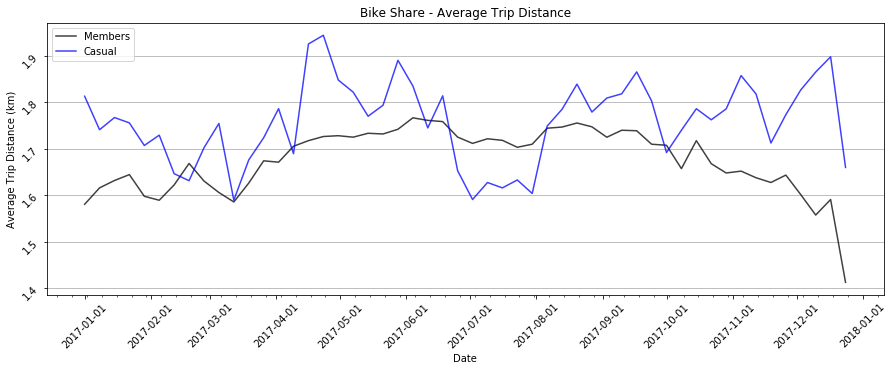

In [70]:
fig, ax1 = plt.subplots(figsize=(15,5))

ax1.plot(dates, member_data["average_distance"].values, color='black', alpha=0.75, label="Members")
ax1.plot(dates, casual_data["average_distance"].values, color='blue', alpha=0.75, label="Casual")

ax1.tick_params(labelrotation=45)
ax1.yaxis.grid()
ax1.xaxis.set_minor_locator(mdates.DayLocator(interval=7))
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d"))

ax1.set(xlabel="Date", ylabel="Average Trip Distance (km)", title="Bike Share - Average Trip Distance")

plt.legend()

# Save the Figure
plt.savefig("average_trip_distance_by_user_type.jpg")

#Show the Figure
plt.show()


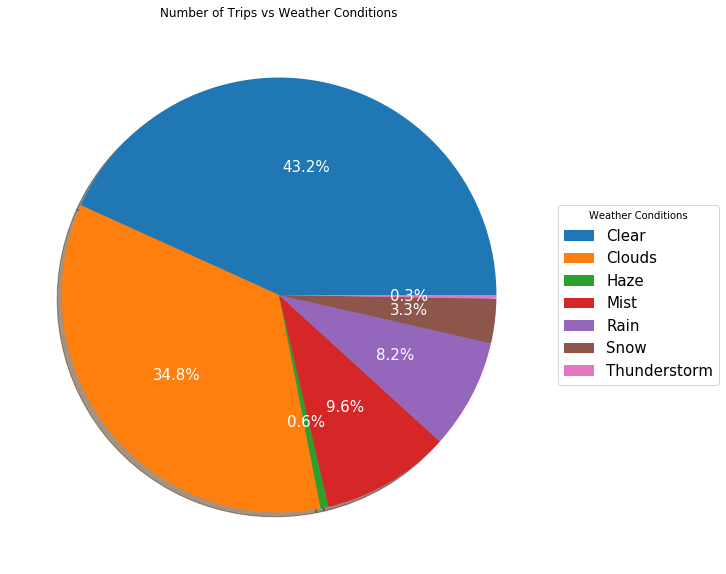

In [71]:
df = pd.DataFrame(combined_df.groupby("weather_main").count())
df.reset_index(inplace=True)

fig, ax1 = plt.subplots(figsize=(10,10))

ax1.pie(df["trip_id"], labels=df["weather_main"], autopct='%1.1f%%', shadow=True, textprops=dict(color="w", size=15))

ax1.legend(df["weather_main"],
          title="Weather Conditions",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          prop={'size': 15})

plt.title("Number of Trips vs Weather Conditions")
# Save the Figure
plt.savefig("total_trips_weather_conditions.jpg")

#Show the Figure
plt.show()



In [84]:
import gmaps

gmaps.configure(api_key="")

# Store latitude and longitude in locations
locations = stations_heat_df[["lat", "lng"]]

# Fill NaN values and convert to float
trips = stations_heat_df["trips"]/10000

# Plot Heatmap
fig = gmaps.figure(zoom_level = 13, center=(43.653226,-79.3831843
))

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=trips, 
                                 dissipating=False, max_intensity=20,
                                 point_radius=0.005)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))